# Eigenvalues and eigenvectors - introduction

This notebook illustrates the how to compute eigenvalues and eigenvectors using numpy. This class is based on Strang (2006).

* Strang, Gilbert. Linear Algebra and Its Applications. 4th ed. Belmont, CA: Thomson, Brooks/Cole, 2006.

#### Import and configure some stuff

In [1]:
# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
%matplotlib widget
# aka import ipympl

In [2]:
import numpy as np
from matplotlib import pyplot as plt

#### Create some useful functions for ploting 3D objects

In [3]:
def unit_vector(inc, dec):
    '''
    Define a unit vector v from its inclination
    and declination as follows:

    v1 = cos(inc) cos(dec)
    v2 = cos(inc) sin(dec)
    v3 = sin(inc)

    where v1, v2 and v3 are the components of v along the x, y and z 
    directions of a local Cartesian system.

    parameters
    ----------
    inc, dec : floats
        Inclination and declination (in degrees) of the unit vector, respectively.

    returns
    -------
    v : numpy array 1d
        Unit vector with components v1, v2 and v3.
    '''
    
    # verify the input parameters
    if isinstance(inc, (float, int)) is not True:
        raise ValueError("inc must float or int")
    if isinstance(dec, (float, int)) is not True:
        raise ValueError("dec must float or int")

    # convert inc and dec from degrees to radian
    I = np.deg2rad(inc)
    D = np.deg2rad(dec)

    # define the unit vector components
    v = np.array([np.cos(I)*np.cos(D), np.cos(I)*np.sin(D), np.sin(I)])

    return v

In [4]:
def draw_region(
    ax, xmin, xmax, ymin, ymax, zmin, zmax, label_size=14, ticks_size=12
):
    '''
    Draw the 3D region where the objects will be plotted.

    Parameters
    ----------
    ax : axes of a matplotlib figure.
        xmin, xmax, ymin, ymax, zmin, zmax: floats
        Lower and upper limites along the x-, y- and z- axes.
    '''
    for boundary in [xmin, xmax, ymin, ymax, zmin, zmax]:
        if isinstance(boundary, (int, float)) is not True:
            raise ValueError("All boundaries must be int or float.")
    for (lower, upper) in [(xmin, xmax), (ymin, ymax), (zmin, zmax)]:
        if lower >= upper:
            raise ValueError("Lower boundaries must be smaller than upper boundaries.")

    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_zlim(zmin, zmax)
    ax.grid()
    ax.xaxis.set_tick_params(labelsize=ticks_size)
    ax.yaxis.set_tick_params(labelsize=ticks_size)
    ax.zaxis.set_tick_params(labelsize=ticks_size)
    ax.set_xlabel("x (m)", fontsize=label_size)
    ax.set_ylabel("y (m)", fontsize=label_size)
    ax.set_zlabel("z (m)", fontsize=label_size)

In [5]:
def draw_vector(vector, origin=np.zeros(3), color='k', linewidth=1):
    '''
    Draw a vector with given origin and Cartesian components.

    Parameters
    ----------
    vector : numpy array 1d
        Cartesian components of the vector to be plotted.
    origin : numpy array 1d
        Cartesian components of the point where the vector is attached.
        Default is a vector of zeros.
    color : Matplotlib color 
        The color attibuted to the plotted vector. Colors are specified according to:
        https://matplotlib.org/stable/users/explain/colors/colors.html#colors-def .
        Default is black ('k').
    linewidth : positive scalar
        Positive scalar defining the linewidth of the plotted vector.
        Default is 1.
    '''
    for parameter in [vector, origin]:
        if isinstance(parameter, np.ndarray) is not True:
            raise ValueError("all input parameters must be numpy arrays.")
        if parameter.ndim != 1:
            raise ValueError("all input parameters must have ndim = 1.")
        if parameter.size != 3:
            raise ValueError("all input parameters must have size = 3.")
    if isinstance(linewidth, (int, float)) is not True:
        raise ValueError("linewidth must be a int or float.")
    if linewidth < 0:
        raise ValueError("linewidth cannot be negative.")

    ax.quiver(
        origin[0], 
        origin[1], 
        origin[2], 
        vector[0], 
        vector[1], 
        vector[2], 
        length=1, 
        linewidth=linewidth, 
        normalize=False, 
        pivot='tail', 
        color=color
    )

#### Create a 3D region with some vectors

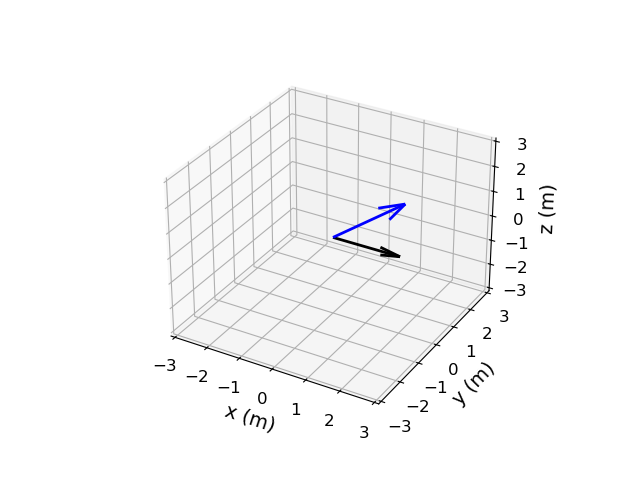

In [6]:
ax = plt.figure().add_subplot(projection='3d')

# create the region to plot
draw_region(
    ax=ax, 
    xmin=-3,
    xmax=3,
    ymin=-3,
    ymax=3,
    zmin=-3,
    zmax=3
)

# create a vector with origin at (0,0,0), 
# length 2, color black and aligned with x axis
u = 2*unit_vector(inc=0, dec=0)

# plot the vector u
draw_vector(vector=u, linewidth=2)

# create a vector with origin at (1,1,0), 
# length 3, color blue and aligned with z axis
v = 3*unit_vector(inc=45, dec=0)

# plot the vector v
draw_vector(vector=v, color='b', linewidth=2)

plt.show()

#### Create a matrix

In [7]:
# Lets use the create a single 2 x 2 matrix
A = np.array([[0, 2],[2, 3]])

In [8]:
print(A)

[[0 2]
 [2 3]]


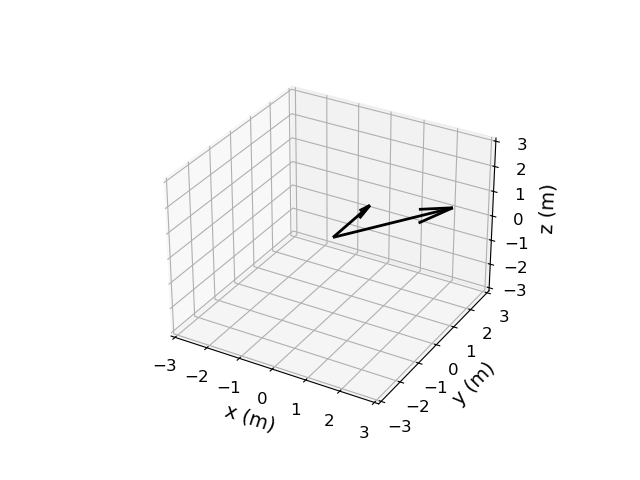

In [9]:
# The columns of A can be thought of vector in the xy plane
ax = plt.figure().add_subplot(projection='3d')

# create the region to plot
draw_region(
    ax=ax, 
    xmin=-3,
    xmax=3,
    ymin=-3,
    ymax=3,
    zmin=-3,
    zmax=3
)

for vector in A.T:
    draw_vector(vector=np.hstack([vector,0]), linewidth=2)

plt.show()

Can you explain the results below?

In [10]:
print('A.T@A =\n {} \n'.format(A.T@A))
print('A@A.T =\n {} \n'.format(A@A.T))
print('A.T@A = A@A.T ? {} \n'.format(np.allclose(A.T@A, A@A.T)))
print('A.T@A = Identity ? {}'.format(np.allclose(A.T@A, np.identity(A.shape[0]))))

A.T@A =
 [[ 4  6]
 [ 6 13]] 

A@A.T =
 [[ 4  6]
 [ 6 13]] 

A.T@A = A@A.T ? True 

A.T@A = Identity ? False


Note that $\mathbf{A} \, \mathbf{A}^{\top} = \mathbf{A}^{\top} \, \mathbf{A}$ if $\mathbf{A}$ is symmetric. Besides, if the columns of $\mathbf{A}$ are orthonormal vectors, then $\mathbf{A}$ satisfies $\mathbf{A} \, \mathbf{A}^{\top} = \mathbf{A}^{\top} \, \mathbf{A} = \mathbf{I}$, where $\mathbf{I}$ is the identity matrix.

What about the vector $\mathbf{A \, x}$, where $\mathbf{x}$ is an arbitrary $2 \times 1$ vector?

In [11]:
# create an arbitrary vector x
x = np.array([-1.3, 2.2])

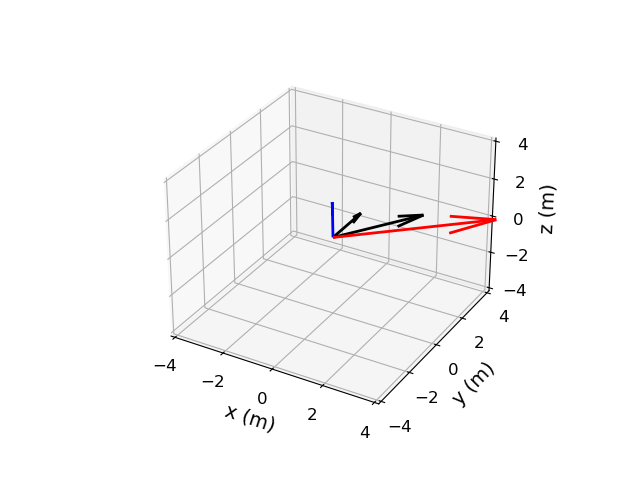

In [12]:
region_bounds = 4
plt.close('all')
ax = plt.figure().add_subplot(projection='3d')

# create the region to plot
draw_region(
    ax=ax, 
    xmin=-region_bounds,
    xmax=region_bounds,
    ymin=-region_bounds,
    ymax=region_bounds,
    zmin=-region_bounds,
    zmax=region_bounds
)

# columns of A
for vector in A.T:
    draw_vector(vector=np.hstack([vector,0]), linewidth=2, color='k')

# vector x
draw_vector(vector=np.hstack([x,0]), linewidth=2, color='b')

# vector Ax
draw_vector(vector=np.hstack([A@x,0]), linewidth=2, color='r')

plt.show()

Note that $\mathbf{A \, x}$ is a vector with length and direction different from the original vector $\mathbf{x}$.

Are there special vectors that satisfy $\mathbf{A \, x} = \lambda \, \mathbf{x}$, where $\lambda$ is a constant? In this case, $\mathbf{A \, \mathbf{x}}$ is a vector with the same direction of the original $\mathbf{x}$.

How to compute the possible special vectors satisfying $\mathbf{A \, x} = \lambda \, \mathbf{x}$? Note that, in this case, we have that:

$$\mathbf{A \, x} - \lambda \, \mathbf{x} = \mathbf{0}$$

or

$$\left( \mathbf{A} - \lambda \, \mathbf{I} \right) \mathbf{x} = \mathbf{0} \: .$$

Vectors $\mathbf{x} = \mathbf{0}$ obviously satisfy this condition, but such vectors are boring. We want to find vectors $\| \mathbf{x} \|_{2} \ne 0$ that satisfy the condition above.

To solve the this problem, it is important to note that the determinant of $\mathbf{A} - \lambda \, \mathbf{I}$ must be zero, i.e,

$$\vert \mathbf{A} - \lambda \, \mathbf{I} \vert = 0 \: .$$

For our $2 \times 2$ matrix, computing the determinant $\vert \mathbf{A} - \lambda \, \mathbf{I} \vert$ is relatively simple, i.e., for
$$
\mathbf{A} - \lambda \, \mathbf{I} = \begin{bmatrix}
a_{00} - \lambda & a_{01} \\
a_{10} & a_{11} - \lambda
\end{bmatrix}
$$
we have that
$$
\begin{split}
\det\left( \mathbf{A} - \lambda \, \mathbf{I} \right) 
&= (a_{00} - \lambda) \, (a_{11} - \lambda) - a_{01} \, a_{10} \\
&= a_{00}a_{11} - a_{00}\lambda -\lambda a_{11} + \lambda^{2} - a_{01} \, a_{10} \\
&= \lambda^{2} - (a_{00} + a_{11})\lambda - a_{01} \, a_{10}
\end{split}
$$

which has the solution

$$
\lambda = \frac{(a_{00} + a_{11}) \pm \sqrt{(a_{00} + a_{11})^{2} + 4 \, a_{01} \, a_{10}}}{2}
$$

This is equation has two solutions that can be easily computed as follows:

In [13]:
delta = np.sqrt((A[0,0]+A[1,1])**2 + 4*A[0,1]*A[1,0])
lambda_1 = ((A[0,0]+A[1,1]) - delta)/2
lambda_2 = ((A[0,0]+A[1,1]) + delta)/2

In [14]:
print(lambda_1, lambda_2)

-1.0 4.0


There is a special vector associated with each $\lambda$ defined above. The determine them, we have to solve the linear system $\left(\mathbf{A} - \lambda \, \mathbf{I}\right) \, \mathbf{x} = \mathbf{0}$ for each lambda. Let us start with $\lambda_{2} = 4$.

In [15]:
print(A - lambda_1*np.identity(2))

[[1. 2.]
 [2. 4.]]


Is this case, we have that $\mathbf{x} = \begin{bmatrix} x_1 \\ 2 \, x_1 \end{bmatrix}$. Then, a first $\mathbf{x}$ may be given by the following unit vector:

$$
\mathbf{x}_{1} = \frac{1}{\sqrt{1^{2} + 2^{2}}} \begin{bmatrix} 1 \\ 2 \end{bmatrix} \: .
$$

In [16]:
x1 = np.array([1,2])/np.sqrt(1**2 + 2**2)

In [17]:
print(x1)

[0.4472136  0.89442719]


By using the same reasoning, we may obtain the following unit vector:

$$
\mathbf{x}_{2} = \frac{1}{\sqrt{(-2)^{2} + 1^{2}}} \begin{bmatrix} -2 \\ 1 \end{bmatrix} \: .
$$

In [18]:
x2 = np.array([-2,1]) / np.sqrt((-2)**2 + 1**2)

In [19]:
print(x2)

[-0.89442719  0.4472136 ]


Let us take a look into these special vectors.

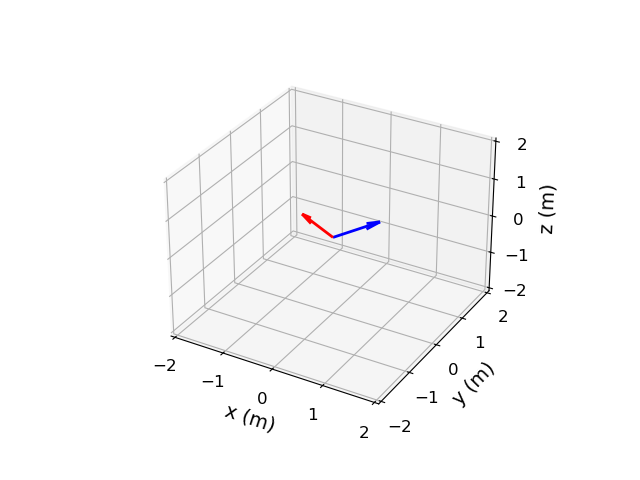

In [22]:
region_bounds = 2
plt.close('all')
ax = plt.figure().add_subplot(projection='3d')

# create the region to plot
draw_region(
    ax=ax, 
    xmin=-region_bounds,
    xmax=region_bounds,
    ymin=-region_bounds,
    ymax=region_bounds,
    zmin=-region_bounds,
    zmax=region_bounds
)

# vector x1
draw_vector(vector=np.hstack([x1,0]), linewidth=2, color='b')

# vector x2
draw_vector(vector=np.hstack([x2,0]), linewidth=2, color='r')

plt.show()

Let us also compute the scalar product of them:

In [23]:
np.sum(x1*x2)

0.0

They are orthonormal!

Now, consider a matrix $\mathbf{V}$ with columns formed by $\mathbf{x}_{1}$ and $\mathbf{x}_{2}$:

In [24]:
V = np.vstack([x1, x2]).T

In [25]:
print(V)

[[ 0.4472136  -0.89442719]
 [ 0.89442719  0.4472136 ]]


Since their columns are orthonormal, then $\mathbf{V} = \begin{bmatrix} \mathbf{x}_{1} & \mathbf{x}_{2} \end{bmatrix}$ satisfies $\mathbf{V}^{\top}\mathbf{V} = \mathbf{V}\mathbf{V}^{\top} = \mathbf{I}$.

In [26]:
print(V.T@V)

[[1. 0.]
 [0. 1.]]


In [27]:
print(V@V.T)

[[1. 0.]
 [0. 1.]]


Now, if we postmultiply $\mathbf{A}$ by $\mathbf{V}$ we obtain:

$$
\begin{split}
\mathbf{A \, V} 
&= \begin{bmatrix} \mathbf{A} \, \mathbf{x}_{1} & \mathbf{A} \, \mathbf{x}_{2} \end{bmatrix} \\
&= \begin{bmatrix} \lambda_{1} \, \mathbf{x}_{1} & \lambda_{1} \, \mathbf{x}_{1} \end{bmatrix} \\
&= \mathbf{V} \begin{bmatrix} \lambda_{1} & 0 \\ 0 & \lambda_{2} \end{bmatrix}
\end{split}
$$

and, finally,

$$
\mathbf{A} = \mathbf{V} \boldsymbol{\Lambda} \mathbf{V}^{\top} \: ,
$$

where $\boldsymbol{\Lambda} = \begin{bmatrix} \lambda_{1} & 0 \\ 0 & \lambda_{2} \end{bmatrix}$. The special vectors $\mathbf{x}_{1}$ and $\mathbf{x}_{2}$ are called **eigenvactors**. The roots $\lambda_{1}$ and $\lambda_{2}$ are called **eigenvalues**. Not that in our example, the matrix $\mathbf{A}$ has two linearly independent eigenvectors and two different eigenvalues. This is not true for all square matrices.

Because our matrix has two linearly independent eigenvectors, it can transformed into a diagonal matrix containing its eigenvalues:

$$
\boldsymbol{\Lambda} = \mathbf{V}^{\top} \mathbf{A} \mathbf{V} \: .
$$

In thsi case, we say that $\mathbf{A}$ is **diagonalizable**.

There are some important remarks on what we have just discussed (Strang, 2006, sec. 5.2):

* If the $N \times N$ matrix $\mathbf{A}$ has no repeated eigenvalues - the numbers $\lambda_{1}, \dots, \lambda_{N}$ are distinct - then its $N$ eigenvectors are automatically independent. Therefore **any matrix with distinct eigenvalues can be diagonalized**.

* The matrix $\mathbf{V}$ is not unique. An eigenvector $\mathbf{x}$ can be multiplied by a constant, and remains an eigenvector. We can multiply the columns of $\mathbf{V}$ by any nonzero constants, and produce a new matrix $\mathbf{V}$. Repeated eigenvalues leave even more freedom in $\mathbf{V}$. For the trivial example $\mathbf{A} = \mathbf{I}$, any invertible $\mathbf{V}$ will do: $\mathbf{V}^{\top} \mathbf{I} \mathbf{V}$ is always the diagonal $\boldsymbol{\Lambda} = \mathbf{I}$. All vectors are eigenvectors of the identity.

* Other matrices $\mathbf{V}$ will not produce a diagonal $\boldsymbol{\Lambda}$. Suppose the first column of $\mathbf{V}$ is $\mathbf{y}$. Then the first column of $\mathbf{V}\boldsymbol{\Lambda}$ is $\lambda_{1} \, \mathbf{y}$. If this is to agree with the first column of
$\mathbf{A \, V}$, which by matrix multiplication is $\mathbf{A \, y}$, then $\mathbf{y}$ must be an eigenvector: $\mathbf{A \, y} = \lambda_{1} \mathbf{y}$. The order of the eigenvectors in $\mathbf{V}$ and the eigenvalues in $\boldsymbol{\Lambda}$ is automatically the same.

* Not all matrices possess $N$ linearly independent eigenvectors, so **not all matrices are diagonalizable**. See, for example, the matrices $\begin{bmatrix} 3 & 1 \\ 0 & 3\end{bmatrix}$ and $\begin{bmatrix} 2 & -1 \\ 1 & 0\end{bmatrix}$.

* **Diagonalizability** of $\mathbf{A}$ depends on enough eigenvectors and **invertibility** of $\mathbf{A}$ depends on nonzero eigenvalues.